# Week 2-3: Discrete random variables


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


___
### Example 1

Consider the  double coin flip experiment $S=\{HH, HT, TH, TT\}$, and define a random variable which counts the number of heads in each outcome. Then 
$$X(HH)=2,\;X(HT)=1,\;X(TH)=1,\; X(TT)=0.$$
 
Observe that Range$(X)=\{0,1,3\}$ and the pmf of the random variable is 
        
$$f(0)=0.25,\; f(1)=0.5,\; f(2)=0.15.$$

Below we draw the line graph and the histogram of the pmf of this random variable.

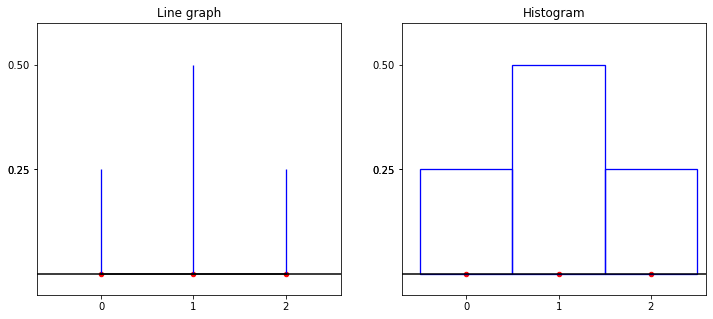

In [30]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

range_x = np.array([0, 1, 2])
pmf_values = np.array([1/4, 1/2, 1/4])

fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(-0.05,0.6) 
ax1.set_xlim(-0.7, 2.6)
ax1.axhline(y=0, color='k')
ax1.set_xticks(range_x)
ax1.set_yticks(pmf_values)

ax2.set_ylim(-0.05, 0.6) 
ax2.set_xlim(-0.7, 2.6)
ax2.axhline(y=0, color='k')
ax2.set_xticks(range_x)
ax2.set_yticks(pmf_values)


# Plotting line graphs using plt.stem with stems removed
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax1.stem(range_x, pmf_values, markerfmt=' ', linefmt="blue", basefmt="black", use_line_collection=True)
stems.set_linewidth(1.3)
ax1.set_title("Line graph")


# PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1.3, label="Histogran")
ax2.set_title("Histogram")

plt.show();
                       

___
### Example 2

If Range$(X)=\{x_1,\dots,x_k\}$ and $P(x_1)=\cdots=P(x_k)=\frac{1}{k}$ then we say that $X$ has uniform distribution.

in the example below, the range of $X$ is 

$$ \text{Range}(X)=\{-3, -6, 5, 9, 2, 1, 3, 8, 7, 10\}$$

with $f(x)=0.1$ for every $x\in \text{Range}(X).$

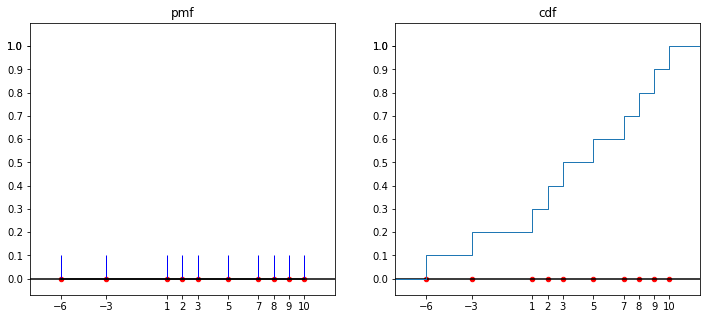

In [31]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

K=10
range_x=np.array([-3, -6, 5, 9, 2, 1, 3, 8, 7, 10])
pmf_values=np.ones(range_x.size)/range_x.size

# Sort x and y according to order in x
sortargs = range_x.argsort()
range_x = range_x[sortargs]
pmf_values = pmf_values[sortargs]

#cdf values using cumsum function with padding
cdf_values = np.cumsum(pmf_values)

def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded, edge

cdf_values_padded, range_x_padded, edge = padding(cdf_values, range_x)
# setting up the figure
fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(-0.07,1.1)
ax1.axhline(y=0, color='k')
ax1.set_xlim(edge)
ax1.set_xticks(range_x)
ax1.set_yticks(cdf_values_padded)

ax2.set_ylim(-0.07,1.1) 
ax2.axhline(y=0, color='k')
ax2.set_xlim(edge)
ax2.set_xticks(range_x)
ax2.set_yticks(cdf_values_padded)


# plot line grapghs
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax1.stem(range_x, pmf_values, markerfmt=' ', linefmt="blue", basefmt="black", use_line_collection=True)
stems.set_linewidth(1)
ax1.set_title("pmf")

# plot cdf using step function
ax2.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
ax2.step(range_x_padded, cdf_values_padded, linewidth=1, where='post')
ax2.set_title("cdf")

plt.show();

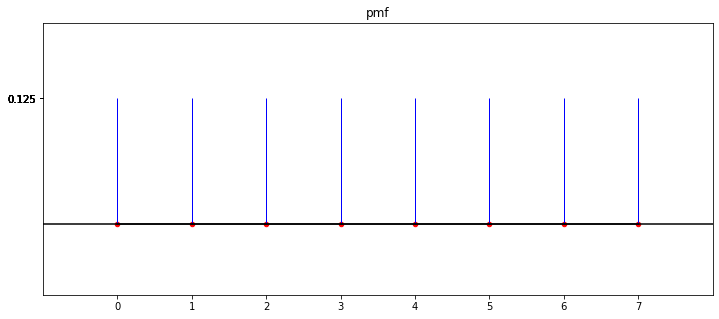

In [51]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

K=10
range_x=np.array([0,1,2,3,4,5,6,7])
pmf_values=np.ones(range_x.size)/range_x.size

# Sort x and y according to order in x
sortargs = range_x.argsort()
range_x = range_x[sortargs]
pmf_values = pmf_values[sortargs]

#cdf values using cumsum function with padding
cdf_values = np.cumsum(pmf_values)

def padding(cdf_values, range_x):
    edge = (range_x[0]-1, range_x[-1]+1)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded, edge

cdf_values_padded, range_x_padded, edge = padding(cdf_values, range_x)
# setting up the figure
fig, ax = plt.subplots()

ax.set_ylim(-0.07,0.2)
ax.axhline(y=0, color='k')
ax.set_xlim(edge)
ax.set_xticks(range_x)
ax.set_yticks(pmf_values)

# plot line graphs
ax.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
markers,stems,base = ax.stem(range_x, pmf_values, markerfmt=' ', linefmt="blue", basefmt="black", use_line_collection=True)
stems.set_linewidth(1)
ax.set_title("pmf")


plt.show();

___
### Relative frequency histogram for pmf

Suppose our data   consists of values of the random variable on a sequence of trial outcomes. As mentioned earlier, probability of an event represents how frequent the experiment outcome terminates in the event, in a large number of repetitive trials. Hence,  the pmf at $x\in\text{Range}(X)$ can be empirically estimated using the relative frequency 

 $$f_{\text{emp}}(x)= \frac{\text{number of elements in data = }x}{ \text{ size of data}}.$$
 
Resulting relative frequency histogram will approximate the pmf histogram.

In the example below, we consider the following experiment: a dice is tossed twice and the random variable is the maximum of the two tosses: 

$$S=\{(i,j):\; 1\leq i\leq n, 1\leq j\leq 6\}$$

and for any $s=(i,j)$,
      
 $$X(i,j)=\max\{i,j\}.$$
 
 It can be seen that in this case, $\text{range}(X)=\{1,\dots, n\}$ and, for any $x\in \text{range}(X)$,
 
 $$f(x)=\frac{2x-1}{n^2}.$$

The data consist of values of $X$ on 1000 random pairs of tosses.

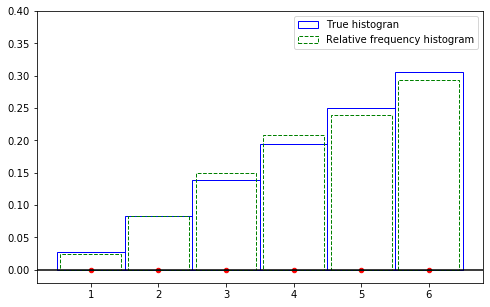

In [8]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8, 5)

n = 6
num_samples=1000

range_x = np.arange(1,n+1)
pmf_values = np.array([(2*i-1)/n**2 for i in range(1,n+1)])

# generate data
toss = np.random.randint(1,n+1,(2,num_samples))
data = np.amax(toss, axis=0).squeeze()

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

# plot 
plt.ylim(-0.02,0.4) 
plt.axhline(y=0, color='k')
plt.xticks(range_x)

plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1, label="True histogran")
plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
plt.legend()
plt.show();

___
### Empirical cdf

Similar to empirical pmf, the empirical cfd is computed as

$$F_{\text{emp}}(x)=\frac{\text{number of outomes }\leq x}{\text{size of data}}.$$

We consider the double die toss experiment. Let the random variable $X$ be the maximum of two tosses. Again,   $\text{Range}(X)=\{1,\dots, 6\}$ and it can be checked that
     $$F(x)=
\begin{cases}
0 & x<1\\
\sum\limits_{i=1}^k\frac{2i-1}{6^2}=\frac{k^2}{6^2} & k\leq x<k+1, \text{ for }k=1,\dots,5\\
1 & 6<x.
\end{cases}$$
In the numerical example below we collect 1000 pairs of tosses of the die and collect the maximum value of each pair as our data. The graph shows the real and the empirical cdf-s.

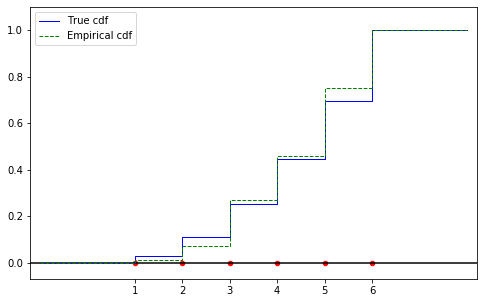

In [9]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8, 5)

n = 6
num_samples=100
range_x = np.arange(1,n+1)

# generate data
toss = np.random.randint(1,n+1,(2,num_samples))
data = np.amax(toss, axis=0).squeeze()

# compute true cdf values
cdf_values = np.array([i**2/n**2 for i in range(1,n+1)])

# compute eepirical cdf values
def ecdf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    cdf_emp = np.cumsum(counts)/data.size
    return cdf_emp, erange_x

ecdf_values, erange_x = ecdf(data)

# add padding 
def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded

cdf_values_padded, range_x_padded = padding(cdf_values, range_x)
ecdf_values_padded, erange_x_padded = padding(ecdf_values, erange_x)

# plot setup
plt.ylim(-0.07,1.1)
plt.xlim(-1.2,8.2)
plt.axhline(y=0, color='k')
plt.xticks(range_x)

# plot cdf using step function
plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.step(range_x_padded, cdf_values_padded, where='post', color="blue", linewidth=1, label="True cdf")
plt.step(erange_x_padded, ecdf_values_padded, where='post', color="green", linewidth=1, linestyle="--", label='Empirical cdf')
plt.legend()

plt.show();


___
### Hypergeometric distribution

Suppose  $N$ balls in an urn, $K$ of which are red, the rest are blue. $n$ balls are selected without order and without replacement.    
 Let $S$ be the set of all such selections.  Consider the following random variable:for $s\in S$, define $X(s)$ to be the number of red balls in $s$.     

In [61]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (20, 10)

def hypergeometric_pmf(N=100,K=30,n=5):
    range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)

    def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

    pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

    # plot setup
    plt.axhline(y=0, color='k')
    plt.xlim(0,50)
    plt.xticks(np.arange(0, 50, 1))



    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1.3, label="Histogran")
    plt.title("N={}, K={}, n={}".format(N,K,n))
    plt.plot();

interact(hypergeometric_pmf, N=(0,100,1), K=(0,100,1), n=(0,100,1));

interactive(children=(IntSlider(value=100, description='N'), IntSlider(value=30, description='K'), IntSlider(v…

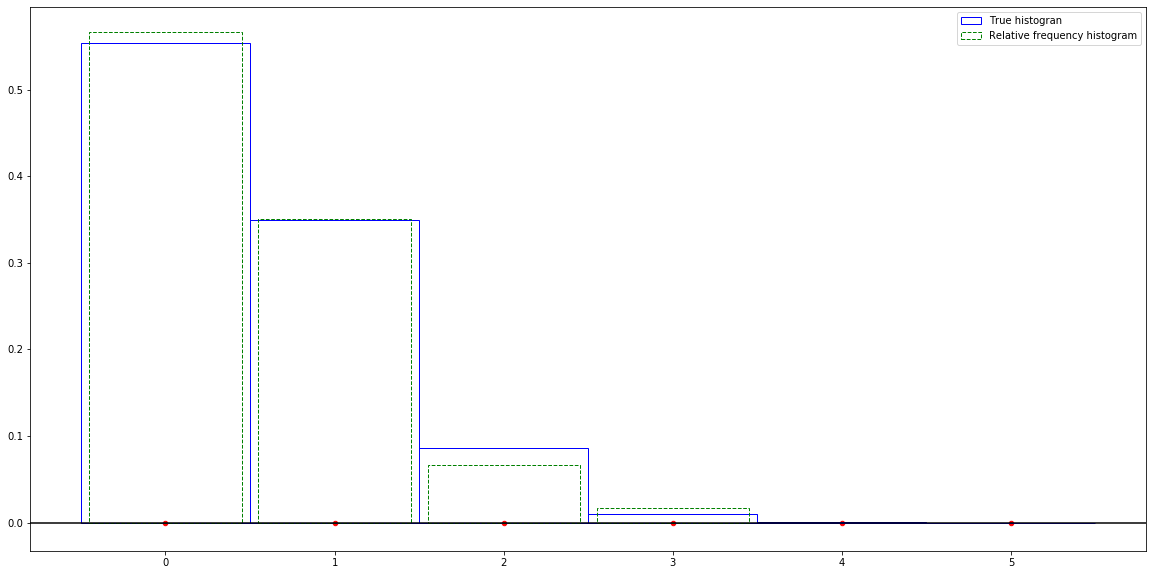

In [113]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
plt.rcParams["figure.figsize"] = (20, 10)

N = 450
K = 50
n = 5
num_data= 60


range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)
def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

# generate data
data = np.random.hypergeometric(K, N-K, n, num_data)


# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

# plot setup
plt.axhline(y=0, color='k')
#plt.xlim(-1,N)
#plt.xticks(np.arange(0, N, 1))
plt.xticks(range_x)

plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1, label="True histogran")
plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
plt.legend()
plt.show();



In [116]:
np.mean(data)

0.5333333333333333

[18 10  2]


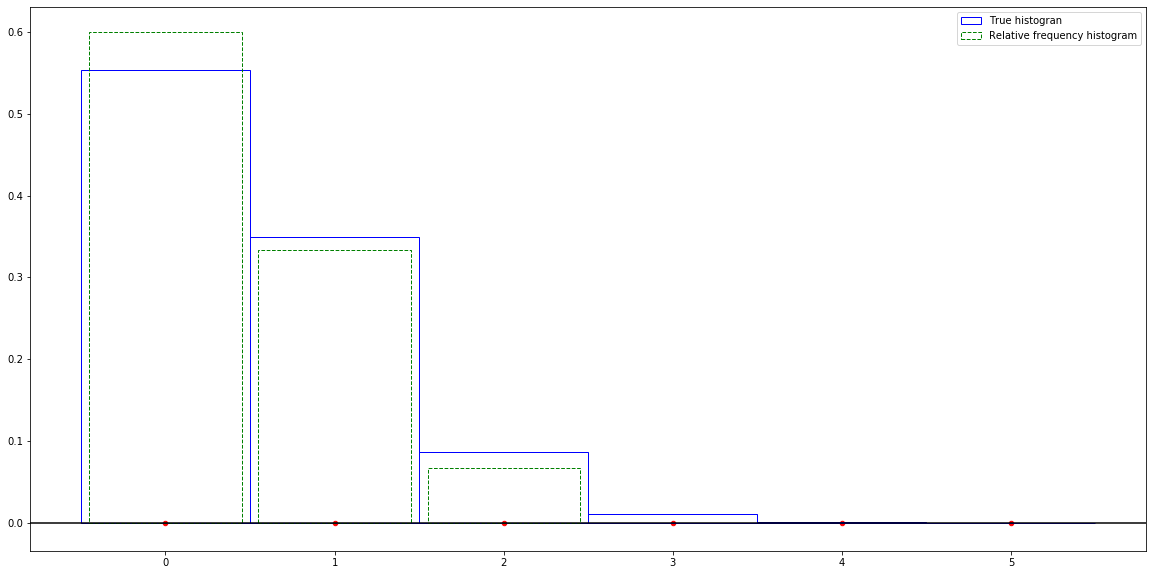

In [92]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
plt.rcParams["figure.figsize"] = (20, 10)

N = 450
K = 50
n = 5
num_samples=60

range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)
def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

# generate data
data = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1])

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    print(counts)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

# plot setup
plt.axhline(y=0, color='k')
#plt.xlim(-1,N)
#plt.xticks(np.arange(0, N, 1))
plt.xticks(range_x)

plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1, label="True histogran")
plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
plt.legend()
plt.show();

In [55]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (20, 10)

N = 100
K = 30
n = 5
num_samples=30

range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)
def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

# generate data
data = np.array([1, 2, 1, 1, 3, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 4, 3, 2, 1, 1,
       2, 3, 2, 3, 0, 0, 2, 1])

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    print(counts)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

def hypergeometric_pmf(N=100,K=30,n=5):
    range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)

    def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

    pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

    # plot setup
    plt.axhline(y=0, color='k')
    plt.xlim(-2,50)
    plt.xticks(np.arange(0, 50, 1))



    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(erange_x,np.zeros(erange_x.shape), color ="red", s=20)
    plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1.3, label="Histogran")
    plt.title("N={}, K={}, n={}".format(N,K,n))
    plt.plot();

interact(hypergeometric_pmf, N=(0,100,10), K=(0,100,1), n=(0,100,1));

[ 5 11  9  4  1]


interactive(children=(IntSlider(value=100, description='N', step=10), IntSlider(value=30, description='K'), In…

[-5.  -1.   0.   2.   6.4]
[0.33 0.02 0.35 0.2  0.1 ]


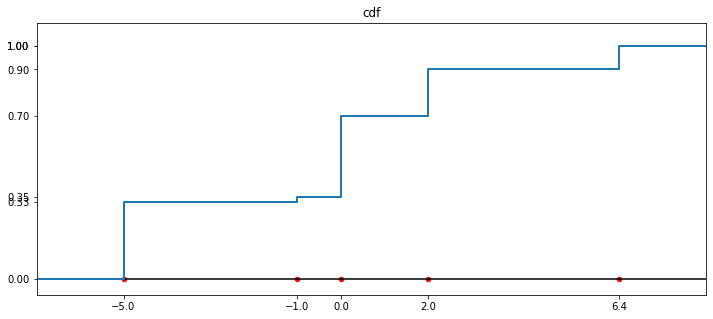

In [38]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12, 5)

K=10
range_x=np.array([2, -1, 0, -5, 6.4])
pmf_values=np.array([0.2, 0.02, 0.35, 0.33, 0.1])

# Sort x and y according to order in x
sortargs = range_x.argsort()
range_x = range_x[sortargs]
print(range_x)
pmf_values = pmf_values[sortargs]
print(pmf_values)

#cdf values using cumsum function with padding
cdf_values = np.cumsum(pmf_values)

def padding(cdf_values, range_x):
    edge = (range_x[0]-2, range_x[-1]+2)
    range_x_padded = np.pad(range_x, (1,1), 'constant', constant_values=edge)
    cdf_values_padded = np.pad(cdf_values, (1,1), 'constant', constant_values=(0, 1))
    return cdf_values_padded, range_x_padded, edge

cdf_values_padded, range_x_padded, edge = padding(cdf_values, range_x)
# setting up the figure

plt.ylim(-0.07,1.1) 
plt.axhline(y=0, color='k')
plt.xlim(edge)
plt.xticks(range_x)
plt.yticks(cdf_values_padded)

# plot cdf using step function
plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
plt.step(range_x_padded, cdf_values_padded, linewidth=2, where='post')
plt.title("cdf")
plt.show();

In [91]:
# nbi:hide_in
# library
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (20, 10)

N = 100
K = 30
n = 5
num_samples=30

range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)
def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

# generate data
data = np.array([1, 2, 1, 1, 3, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 4, 3, 2, 1, 1,
       2, 3, 2, 3, 0, 0, 2, 1])

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    print(counts)
    epmf_values = counts/data.size
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

def hypergeometric_pmf(N=100,K=30,n=5):
    range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)

    def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

    pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

    # plot setup
    plt.axhline(y=0, color='k')
    plt.xlim(-2,50)
    plt.xticks(np.arange(0, 50, 1))



    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(erange_x,np.zeros(erange_x.shape), color ="red", s=20)
    plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1.3, label="Histogran for K=30")
    plt.legend()
    plt.plot();

interact(hypergeometric_pmf, N=(0,100,10), K=(0,100,1), n=(0,100,1));

[ 5 11  9  4  1]


interactive(children=(IntSlider(value=100, description='N', step=10), IntSlider(value=30, description='K'), In…

[ 5 11  9  4  1]
1.5000000000000002 3.3000000000000003


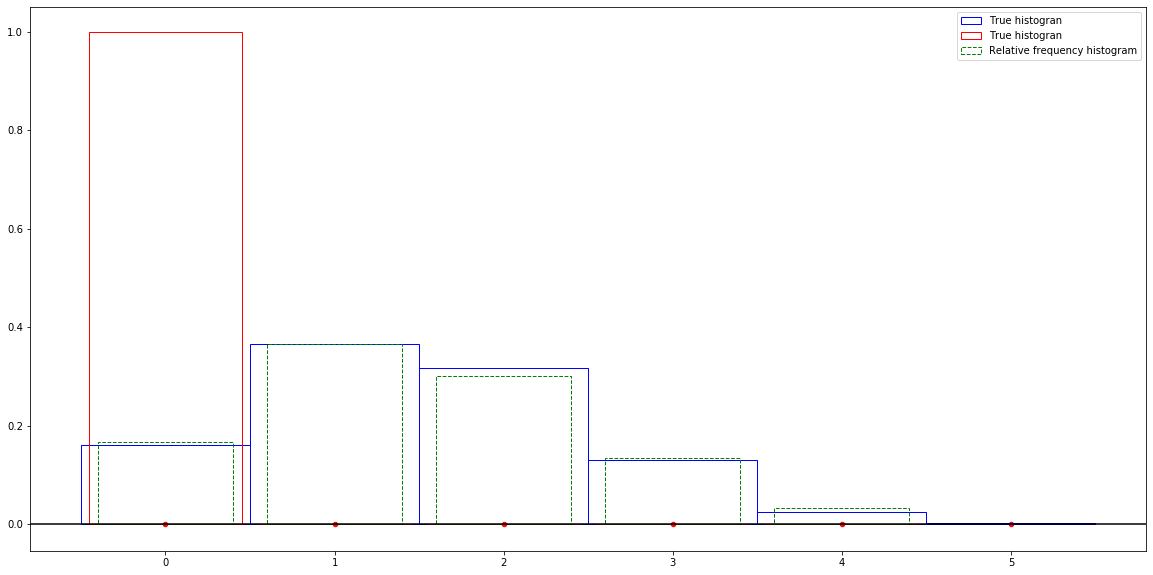

 N_guess = 117.0, K_guess = 3.0,
 mean = 0.5666666666666667


TraitError: setting min > max

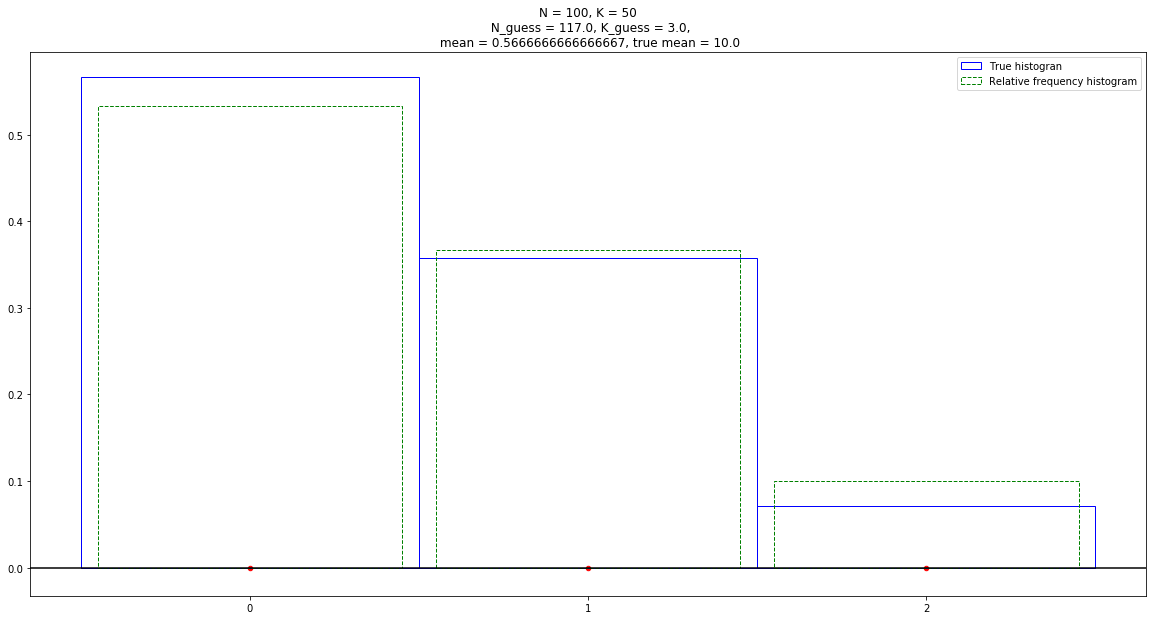

In [90]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact, IntSlider

plt.rcParams["figure.figsize"] = (20, 10)

N = 100
K = 50
n = 20

# data
data_whole = np.array([1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0])

d=30

data = data_whole[:d]

# compute empirical pmf
def epmf(data):
    erange_x, counts = np.unique(data, return_counts=True)
    epmf_values = counts/d
    return epmf_values, erange_x

epmf_values, erange_x = epmf(data)

# mean  
mean = data.sum()/d

# variance
mean2 = np.power(data,2).sum()/d
var = (mean2 - mean**2)*d/(d-1)

# find N and K
N_guess = (n*mean*(n-mean)-n*var) /  (mean*(n-mean)-n*var)
K_guess = N_guess*mean/n

N_guess = np.floor(N_guess)
K_guess = np.floor(K_guess)

print(" N_guess = {}, K_guess = {},\n mean = {}".format(N_guess, K_guess, mean))

def hyper_pmf(N,K,n,i):
    pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
    return pmf_val

pmf_values_guess = np.array([hyper_pmf(N_guess,K_guess,n,i) for i in erange_x])

# plot setup
plt.axhline(y=0, color='k')
#plt.xlim(-1,N)
#plt.xticks(np.arange(0, N, 1))
plt.xticks(erange_x)

plt.scatter(erange_x,np.zeros(erange_x.shape), color ="red", s=20)
plt.bar(erange_x, pmf_values_guess, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1, label="True histogran")
plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
plt.legend()

v = n*(K/N)*(1-K/N)*(N-n)/(N-1)
mu = n*K/N
plt.title("N = {}, K = {}\n N_guess = {}, K_guess = {},\n mean = {}, true mean = {}".format(N, K, N_guess, K_guess, mean, mu))
plt.plot();

# create interactive variables
d = IntSlider(min=50, max=data.size, step=1, value=50, readout_format='')

# display the interactive plot
interact(hypergeom_find, d=d);


In [39]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact, IntSlider

plt.rcParams["figure.figsize"] = (20, 10)

N = 500
K = 150
n = 20
# data
data = np.array([ 6,  6, 14,  5,  6,  7,  8,  7,  3,  5,  7,  5,  5,  1, 11,  8,  5,
        6,  3,  6,  5,  2,  6, 10,  8, 10,  7,  7,  7,  3,  9,  5,  6,  8,
        7,  8,  7,  4,  5,  6,  5,  6,  8,  4,  6,  5,  5,  5,  3,  7,  7,
        5,  6,  4,  4,  3,  6,  7,  8,  9,  3,  5,  9,  8,  7,  2,  5,  3,
        9,  4,  5,  5,  3,  3,  5,  4, 11,  7,  7,  6,  8,  7,  5,  4, 11,
        9,  4,  4,  4,  4,  8,  5,  4,  7,  3,  7,  3,  7,  4,  5,  7,  6,
        8,  4,  7,  8,  2,  4,  5,  4,  7,  6,  7,  3,  6,  4,  5,  8,  5,
        3,  3,  8,  7,  6,  9, 12,  7, 10,  7,  4,  9,  4,  2,  4,  6,  6,
        8,  8,  4,  6,  5,  6,  6,  6,  8, 10,  9,  8,  5,  9,  8,  6,  7,
        5, 10,  8,  6,  5,  4, 10,  5,  5,  6,  6,  5,  7,  7,  5,  8,  6,
        5,  7,  7,  4,  3,  8,  6,  6,  6,  7,  5,  5,  7,  5,  2,  6,  6,
        5,  6,  3,  8,  8,  8,  8,  6,  6,  8,  3,  5,  6,  7,  2,  3,  6,
        6,  2,  9,  9,  8,  6,  6,  5,  9,  5,  4,  7,  7,  6,  8,  4,  5,
        7,  4,  6,  4,  7,  4,  9,  3,  4,  6,  4,  5,  8,  7,  8,  6,  6,
        9,  3,  5,  7,  6,  2,  9,  7,  4,  7,  6,  9,  7,  3,  6,  3,  4,
       11,  9,  3,  6,  5,  6,  9,  8,  6,  5,  3,  6,  6,  6,  7,  8,  5,
        4,  6,  7,  7,  6,  7,  3,  2,  5,  6,  6,  7,  6,  7,  6,  5,  7,
        2,  7,  9,  7, 11,  4,  4,  7,  4,  4,  5,  4,  7,  7,  7,  7,  5,
        8,  7,  8,  4,  1, 11,  8,  6,  3,  6,  6,  4,  3,  6,  6,  8,  7,
        6,  9,  8,  4,  9,  3, 10,  7,  3,  6,  4,  6,  4,  7,  3,  9,  4,
        8,  6,  7,  5,  9,  6, 10,  5,  3,  5,  8,  2,  7,  5,  6,  1,  7,
        6,  9, 12,  7,  4,  7,  7,  6, 10,  4,  5,  8,  6,  4,  6,  3,  5,
        8,  8, 10,  9,  7,  6,  8,  4,  6,  6,  5,  7,  8,  6,  9,  4,  9,
        2,  5,  6, 10,  7,  4,  5,  1,  4,  5,  9,  5,  7,  4,  9,  6,  7,
        6,  6,  6,  7,  6,  6,  8,  7,  9,  4,  8,  5,  5,  7,  6,  6,  6,
        5,  5,  3,  6,  4,  5,  8,  6,  6,  4,  5,  5,  3,  6,  6,  8,  7,
        8,  4,  4,  9,  5,  4,  4,  2,  7,  8,  5,  6,  8,  3,  5,  5, 10,
        4,  5,  7,  2,  4, 12,  6,  7,  8,  9,  4,  4,  4,  5,  3,  6,  3,
       10,  6,  8,  5, 11,  7,  6,  6,  3,  3,  5,  2,  1,  9,  8,  3,  6,
        6,  3,  9,  7,  6,  6,  5,  8,  6,  6,  3,  4,  3,  6,  4,  8,  2,
        6,  4,  6,  7,  7,  7,  5,  7,  5,  4,  4,  7,  5,  8,  5,  5,  9,
       11, 12,  5,  3,  6,  5,  6,  8,  8,  4, 10,  8,  4,  5,  8,  6,  8,
        5,  4,  9,  9,  3,  5,  5,  3,  6,  9,  6,  3,  7,  8,  3,  7,  4,
        3,  8,  5, 10,  7,  6,  6,  8,  3,  3,  8,  6,  5,  6, 10,  6,  6,
        5,  8,  7,  2,  5,  6,  6,  5,  6,  8, 10,  3,  6,  8,  9,  4,  5,
        8, 10,  6,  6,  7,  5,  8,  4,  9, 11,  7,  6,  8,  8,  7,  6,  7,
        3,  6,  6, 12,  8,  3,  8,  5,  5,  4,  3,  5,  2,  7,  6,  3,  8,
        6,  8,  6,  6, 10,  4,  5,  1,  5,  5,  8,  5,  5,  6,  3,  7,  4,
        8,  9,  4,  5,  7,  2,  6,  8,  8,  9,  5,  4,  9,  4,  6,  6,  4,
        5,  3,  8,  4,  2,  6,  5,  6,  9,  9,  6,  5,  7,  4,  5,  9,  6,
        6,  4,  7,  8,  6,  9,  6,  3, 10,  7,  5,  8,  5,  6,  7,  5,  6,
        4,  5,  5,  7,  4,  7,  5,  6,  6,  7,  7,  6,  4,  2,  4,  6,  3,
        5,  5,  6,  8,  8,  3,  5,  5,  6,  4,  6,  5,  3,  4,  7,  7,  4,
        8,  4,  6,  8,  6,  5,  4,  7,  3,  3,  8,  7,  5, 10,  5,  6,  8,
        5,  7, 11,  6,  6,  7,  6, 11,  5,  6,  7,  8,  4,  8,  6,  5,  7,
        3,  3,  6,  5,  8,  7,  5,  6,  4,  2,  5,  5,  6,  5,  4,  7,  7,
        7,  8,  2,  6,  5,  7,  8,  5,  6,  5,  8,  4,  9,  5,  5, 10,  8,
        6,  5,  6,  6,  6,  6,  9,  6,  5,  4,  5,  4,  7,  7,  9,  5,  4,
        8,  8, 11,  7,  6,  5,  6,  7,  7,  4,  8,  8,  8, 11,  3,  9,  7,
        7,  7,  8,  2, 10,  6,  6,  7,  2,  5,  6, 10,  5,  4,  5,  9,  6,
        4,  5,  5,  3,  7,  3,  5,  6,  5,  6,  9,  8,  5,  4,  6,  7,  5,
        5,  4,  5,  5,  7,  6, 10,  8,  9,  6,  7,  5,  3,  7,  3,  9,  8,
        6,  2,  5,  5,  5,  4,  9,  5,  6,  4,  7,  7,  5,  6,  6,  5,  8,
        5,  6,  7,  5,  6,  4,  6,  5,  7,  3,  7,  3,  6,  3, 10,  6,  5,
        4,  4,  4,  8,  5,  3,  6, 10,  7,  6,  8,  7,  4,  3,  7,  6,  8,
        3,  3,  8,  2,  5, 10,  5,  4,  8,  7,  5,  6,  3,  8,  2,  5,  4,
        5,  7,  5,  2,  5,  8,  7,  7,  6,  5,  5,  7,  7,  6,  4,  3,  6,
        6,  6,  4,  5,  6,  4,  9,  8,  6,  9,  8,  4,  9,  8,  5,  8,  7,
        3,  4,  7,  9,  5,  3,  5,  7,  7,  4,  6,  5,  2,  9])

def hypergeom_find(d):
    data = data_whole[:d]

    # compute empirical pmf
    def epmf(data):
        erange_x, counts = np.unique(data, return_counts=True)
        epmf_values = counts/d
        return epmf_values, erange_x

    epmf_values, erange_x = epmf(data)

    # mean  
    mean = data.sum()/d

    # variance
    mean2 = np.power(data,2).sum()/data.size
    var = (mean2 - mean**2)*d/(d-1)

    # find N and K
    p = mean/n
    #N_guess = (n**2 * p * (1-p) - var) /  (n * p * (1-p) - var)
    #K_guess = N_guess*p
    N_guess = (n*mean*(n-mean)-n*var) /  (mean*(n-mean)-n*var)
    K_guess = N_guess*mean/n

    N_guess = np.floor(N_guess)
    K_guess = np.floor(K_guess)

    def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val

    pmf_values_guess = np.array([hyper_pmf(N_guess,K_guess,n,i) for i in erange_x])

    # plot setup
    plt.axhline(y=0, color='k')
    #plt.xlim(-1,N)
    #plt.xticks(np.arange(0, N, 1))
    plt.xticks(erange_x)

    plt.scatter(erange_x,np.zeros(erange_x.shape), color ="red", s=20)
    plt.bar(erange_x, pmf_values_guess, width=1, color=(1, 1, 1, 0), edgecolor='blue', linewidth=1, label="True histogran")
    plt.bar(erange_x, epmf_values, width=0.9, color=(1, 1, 1, 0), edgecolor='green', linewidth=1,linestyle="--", label="Relative frequency histogram")
    plt.legend()

    v = n*(K/N)*(1-K/N)*(N-n)/(N-1)
    plt.title("N = {}, K = {}\n N_guess = {}, K_guess = {},\n mean = {}".format(N, K, N_guess, K_guess, mean))
    plt.plot();

# create interactive variables
d = IntSlider(min=50, max=data.size, step=1, value=50, readout_format='')

# display the interactive plot
interact(hypergeom_find, d=d);


92.08